In [34]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import logomaker

motifs = ['A','B','C','D','E','F','G']

residues = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']

[AFMV]GWDYPK


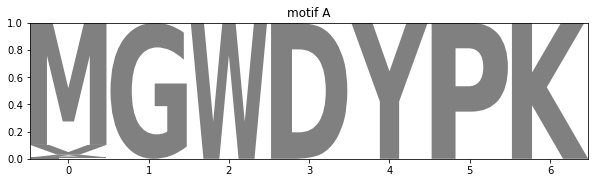

In [55]:

for motif in motifs:
    fasta = open(f"./motif{motif}.fa")
    
    records = list(SeqIO.parse(fasta, format='fasta'))
    N = len(records)
    sequences = [str(record.seq) for record in records]
    residues = list(set(''.join(sequences)))
    motif_length = len(sequences[0])

    data = logomaker.alignment_to_matrix(sequences, to_type='counts', characters_to_ignore='X')
    for i in range(motif_length):
        data.loc[i] = data.loc[i] / N

    #entropy
    #entropy_matrix = -data * np.log2(data)
    #entropy_matrix = entropy_matrix.sum(axis=1).to_frame(name='entropy').T
   

    # Display the logo
    logo = logomaker.Logo(data)
    logo.ax.set_title(f"motif {motif}")

    
    columns_with_values = data.apply(lambda x: list(x[x > 0].index), axis=1)
    pattern:str=""
    #print(columns_with_values)
    for index, row in columns_with_values.items():
        if len(row) > 1:
            pattern += f"[{''.join(row)}]"
        elif len(row) == 1:
            pattern += row[0]
    print(pattern)

    fasta.close()
    #
    #data.to_csv(f"./motif{motif}.csv", index=False)
    
    break


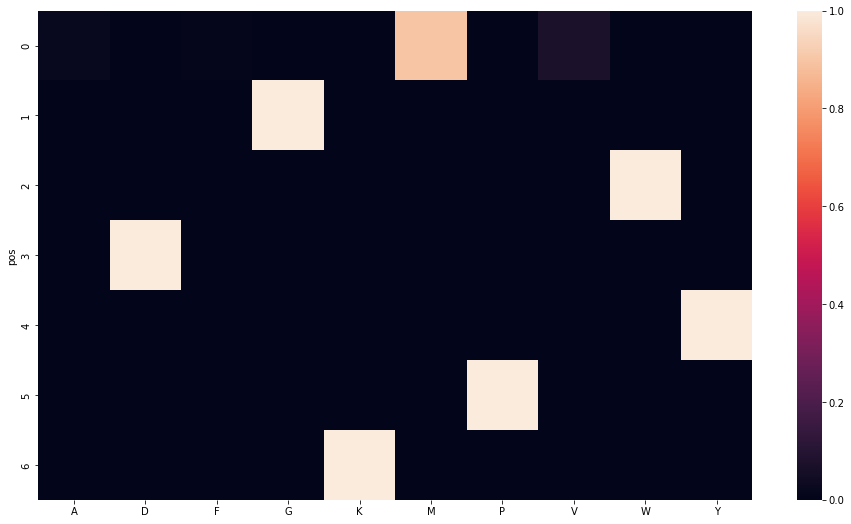

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
sns.heatmap(data, annot=False, vmin=0, vmax=1)
plt.show()

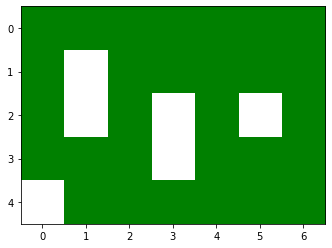

In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl

testdf = [
    [1,1,1,1,1,1,1],
    [1,0,1,1,1,1,1],
    [1,0,1,0,1,0,1],
    [1,1,1,0,1,1,1],
    [0,1,1,1,1,1,1],
]
df = pd.DataFrame(testdf)

fig, ax = plt.subplots()

cmap = mpl.colors.ListedColormap(['white', 'green'])
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(df, interpolation='none', cmap=cmap, norm=norm)